In [3]:
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('Bone Tumor Dataset.csv')

# Informações Básicas do Dataframe

**Patient ID:** A unique identifier for each patient.  
**Sex:** The patient's sex.  
**Age:** The patient's age at the time of diagnosis.  
**Grade:** The grade of the tumor, which is a measure of how aggressive the tumor is.  
**Histological type:** The type of tumor, such as osteosarcoma or Ewing sarcoma.  
**MSKCC type:** The MSKCC type of the tumor, which is a more specific classification of the tumor.  
**Site of primary STS:** The location of the tumor in the bone.  
**Status (NED, AWD, D):** The patient's status, which can be NED (no evidence of disease), AWD (alive with disease), or D (dead).  
**Treatment:** The treatment that the patient received, such as surgery, radiation therapy, or chemotherapy.  
therapy.

In [5]:
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [6]:
print(f'O dataframe tem {df.shape[0]} linhas e {df.shape[1]} columas')

O dataframe tem 500 linhas e 9 columas


In [7]:
# Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [8]:
df.nunique()

Patient ID              500
Sex                       2
Age                      65
Grade                     2
Histological type        13
MSKCC type                3
Site of primary STS       7
Status (NED, AWD, D)      3
Treatment                 3
dtype: int64

# Criar três novas colunas com os tipos de tratamentos

In [9]:
df['Treatment'].value_counts()

Treatment
Radiotherapy + Surgery                   293
Radiotherapy + Surgery + Chemotherapy    143
Surgery + Chemotherapy                    64
Name: count, dtype: int64

In [10]:
# Criar três novas colunas separados pelo "+"
df[['Radiotherapy', 'Surgery', 'Chemotherapy']] = df['Treatment'].str.split('+', expand=True)
# Apagar coluna Treatment
df = df.drop(columns=['Treatment'])

## Apagar os espaços

In [11]:
df['Radiotherapy'] = df['Radiotherapy'].str.strip()
df['Chemotherapy'] = df['Chemotherapy'].str.strip()
df['Surgery'] = df['Surgery'].str.strip()

## Organizar os dados e transformar em dados qualitativos binários

In [12]:
# Mudar para "Chemotherapy" na coluna Chemotherapy, tudo que estiver como "Chemoterapy" na coluna Surgery.
df.loc[df['Surgery'] == 'Chemotherapy', 'Chemotherapy'] = df.loc[df['Surgery'] == 'Chemotherapy', 'Chemotherapy'].replace({None:'Chemotherapy'})

# Mudar para "Surgery" na coluna Surgery, tudo que estiver como "Surgery" na coluna Radiotherapy.
df.loc[df['Radiotherapy'] == 'Surgery', 'Surgery'] = df.loc[df['Radiotherapy'] == 'Surgery', 'Surgery'].replace({None:'Surgery'})

# Mudar pra None tudo que estiver como "Surgery" na coluna Radiotherapy
df.loc[df['Radiotherapy'] == 'Surgery', 'Radiotherapy'] = df.loc[df['Radiotherapy'] == 'Surgery', 'Radiotherapy'].replace({'Surgery':None})

#Mudar pra "Surgery" tudo que estiver como "Chemotherapy" na coluna Surgery
df.loc[df['Surgery'] == 'Chemotherapy', 'Surgery'] = df.loc[df['Surgery'] == 'Chemotherapy', 'Surgery'].replace({'Chemotherapy':'Surgery'})

In [13]:
# Transformar em dados qualitativos binários
df['Radiotherapy'] = df['Radiotherapy'].replace({'Radiotherapy':'Yes', None:'No'})
df['Chemotherapy'] = df['Chemotherapy'].replace({'Chemotherapy':'Yes', None:'No'})
df['Surgery'] = df['Surgery'].replace({'Surgery':'Yes', None:'No'})

In [14]:
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Radiotherapy,Surgery,Chemotherapy
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Yes,Yes,No
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,No,Yes,Yes
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Yes,Yes,No
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Yes,Yes,No
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Yes,Yes,Yes


# Próximo passo

In [15]:
df['Sex'].value_counts()

Sex
Female    300
Male      200
Name: count, dtype: int64

In [16]:
df['Age'].value_counts()

Age
63    17
41    17
72    17
45    16
66    16
      ..
23     1
19     1
26     1
29     1
27     1
Name: count, Length: 65, dtype: int64

In [17]:
df['Grade'].value_counts()

Grade
Intermediate    282
High            218
Name: count, dtype: int64

In [18]:
df['Histological type'].value_counts()

Histological type
pleiomorphic leiomyosarcoma                   104
synovial sarcoma                               73
leiomyosarcoma                                 43
myxofibrosarcoma                               40
undifferentiated - pleiomorphic                34
sclerosing epithelioid fibrosarcoma            33
pleiomorphic spindle cell undifferentiated     29
malignant solitary fibrous tumor               29
undifferentiated pleomorphic liposarcoma       28
myxoid fibrosarcoma                            27
poorly differentiated synovial sarcoma         24
pleomorphic sarcoma                            21
epithelioid sarcoma                            15
Name: count, dtype: int64

In [19]:
df['MSKCC type'].value_counts()

MSKCC type
MFH                 225
Leiomyosarcoma      144
Synovial sarcoma    131
Name: count, dtype: int64

In [20]:
df['Site of primary STS'].value_counts()

Site of primary STS
left thigh              152
right thigh             135
right buttock            72
parascapusular           39
left biceps              36
left buttock             36
right parascapusular     30
Name: count, dtype: int64

In [21]:
df['Status (NED, AWD, D)'].value_counts()

Status (NED, AWD, D)
NED    247
D      141
AWD    112
Name: count, dtype: int64

In [22]:
df['Radiotherapy'].value_counts()

Radiotherapy
Yes    436
No      64
Name: count, dtype: int64

In [23]:
df['Surgery'].value_counts()

Surgery
Yes    500
Name: count, dtype: int64

In [24]:
df['Chemotherapy'].value_counts()

Chemotherapy
No     293
Yes    207
Name: count, dtype: int64

# Visualização de dados

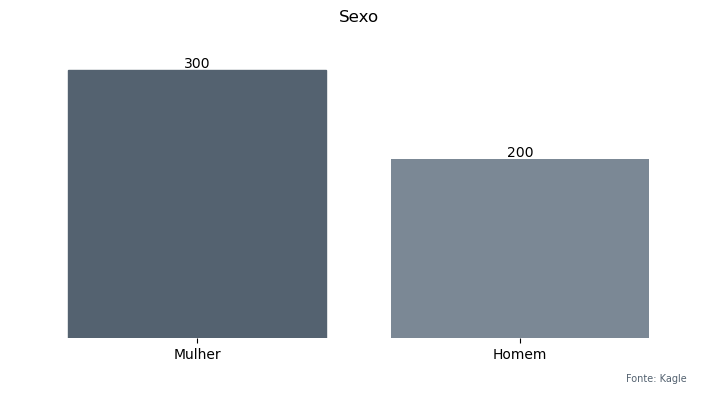

In [29]:
plt.figure(figsize=(9,4))

ax = sns.countplot(df, x='Sex', color='#778899')

ax.set_title('Sexo', loc='center', fontsize=12)
plt.figtext(s='Fonte: Kaggle', fontsize=7, color='#546270', x=0.81, y=0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
plt.yticks([])
plt.xticks([0, 1], ['Mulher', 'Homem'])

ax.bar_label(ax.containers[0], fmt='%.0f')
bars = ax.patches  
bars[0].set_color('#546270') 

ax.margins(x=0.1, y=0.15)

plt.show()

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


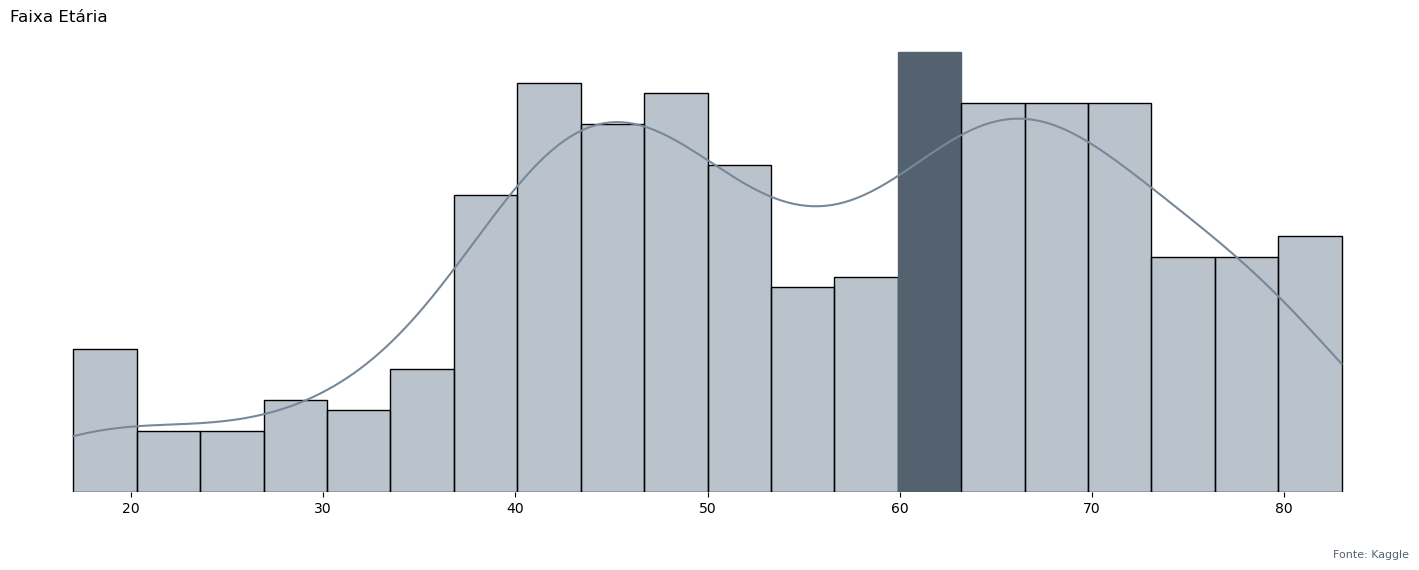

In [58]:
plt.figure(figsize=(18,6))

ax = sns.histplot(data=df, x='Age', color='#778899', bins=20, kde=True)

ax.set_title('Faixa Etária', loc='left', fontsize=12)
plt.figtext(s='Fonte: Kaggle', fontsize=8, color='#546270', x=0.86, y=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
plt.yticks([])

bars = ax.patches  
bars[13].set_color('#546270')  

plt.show()

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


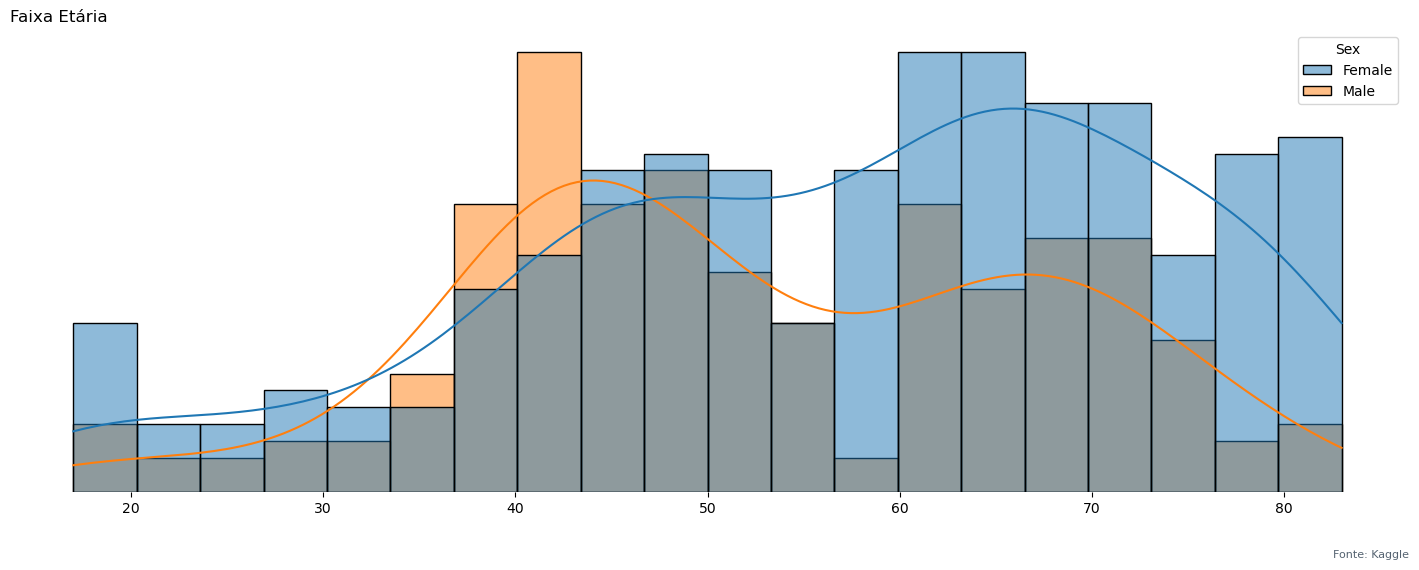

In [56]:
plt.figure(figsize=(18,6))

ax = sns.histplot(data=df, x='Age', color='#778899', bins=20, kde=True, hue='Sex')

ax.set_title('Faixa Etária', loc='left', fontsize=12)
plt.figtext(s='Fonte: Kaggle', fontsize=8, color='#546270', x=0.86, y=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
plt.yticks([])

#bars = ax.patches  
#bars[13].set_color('#546270')  

plt.show()

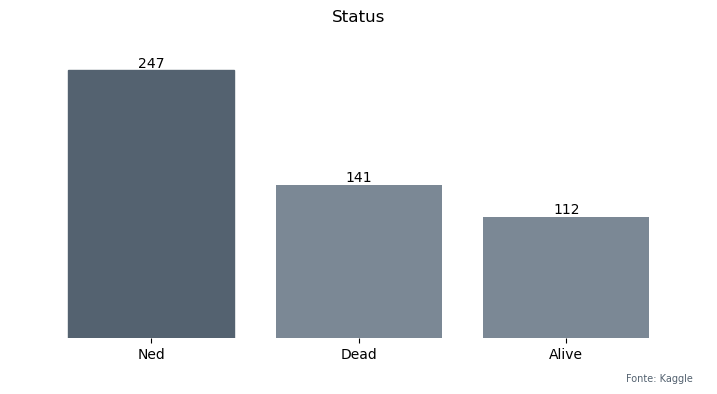

In [62]:
plt.figure(figsize=(9,4))

ax = sns.countplot(df, x='Status (NED, AWD, D)', color='#778899')

ax.set_title('Status', loc='center', fontsize=12)
plt.figtext(s='Fonte: Kaggle', fontsize=7, color='#546270', x=0.81, y=0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
plt.yticks([])
plt.xticks([0, 1, 2], ['Ned', 'Dead', 'Alive'])

ax.bar_label(ax.containers[0], fmt='%.0f')
bars = ax.patches  
bars[0].set_color('#546270') 

ax.margins(x=0.1, y=0.15)

plt.show()

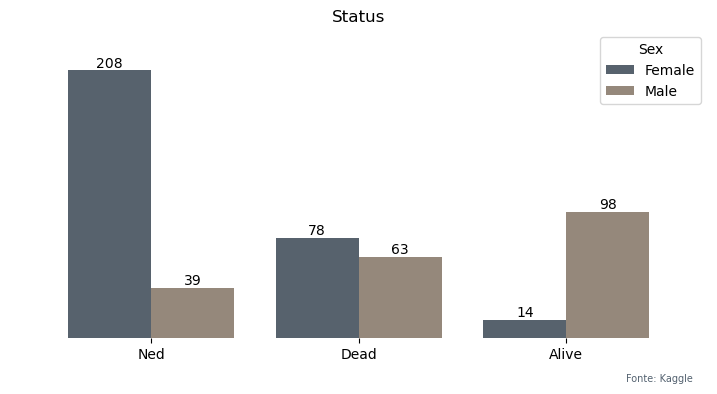

In [76]:
plt.figure(figsize=(9,4))

ax = sns.countplot(df, x='Status (NED, AWD, D)', palette=['#546270', '#998877'], hue='Sex')

ax.set_title('Status', loc='center', fontsize=12)
plt.figtext(s='Fonte: Kaggle', fontsize=7, color='#546270', x=0.81, y=0)

ax.set_xlabel('')
ax.set_ylabel('')
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
plt.yticks([])
plt.xticks([0, 1, 2], ['Ned', 'Dead', 'Alive'])

ax.bar_label(ax.containers[0], fmt='%.0f')
ax.bar_label(ax.containers[1], fmt='%.0f')

ax.margins(x=0.1, y=0.15)

plt.show()